<a href="https://colab.research.google.com/github/Nilavan/carscan-task/blob/main/Background_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and mount drive

In [ ]:
!pip3 install pixellib

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import pixellib
from pixellib.tune_bg import alter_bg

# Load and process images

In [2]:
image1=Image.open('view1.jpeg')
image2=Image.open('view4.jpeg')

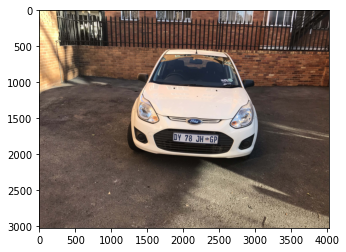

In [3]:
plt.imshow(image1)

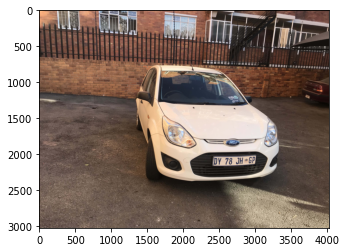

In [4]:
plt.imshow(image2)

# Functions to remove background and add white background

Pixellib cannot make the background transparent so we can change it to some colour (green) and then make the green pixels transparent

In [23]:
def remove_background(no_bg,image_path,id):
  '''Make background transparent:
  -> image_path: path to image
  -> id: image id for output image'''
  
  output_image_name = f"img{id}_no_bg.png"

  # Change background to green
  no_bg.color_bg(image_path=image_path,colors=(0,128,0),detect='car',output_image_name=output_image_name)
  
  img = Image.open(output_image_name)
  img = img.convert("RGBA")
  
  datas = img.getdata()
  newData = []
  
  # Convert green pixels in the image to transparent
  for item in datas:
    if item[0] == 0 and item[1] == 128 and item[2] == 0:
      newData.append((255, 255, 255, 0))
    else:
      newData.append(item)
      
  # Save image
  img.putdata(newData)
  img.save(output_image_name, "PNG")
  
  output=Image.open(output_image_name)
  plt.axis('off')
  plt.imshow(output)
  print("Successful")

def white_background(white_bg,image_path,id):
  '''Make background white:
  -> image_path: path to image
  -> id: image id for output image'''

  output_image_name = f"img{id}_white_bg.png"
  white_bg.color_bg(image_path=image_path,colors=(255,255,255),detect='car',output_image_name=output_image_name)
  
  output=Image.open(output_image_name)
  plt.axis('off')
  plt.imshow(output)
  print("Successful")

In [9]:
model_dir = '/content/drive/MyDrive/models/'
model_path = model_dir + "deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"

img1 = "view1.jpeg"
img2 = "view4.jpeg"

change_bg = alter_bg()
change_bg.load_pascalvoc_model(model_path)

# Remove background

Successful


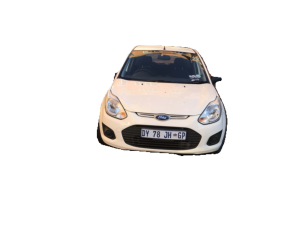

In [24]:
remove_background(change_bg,img1,1)

Successful


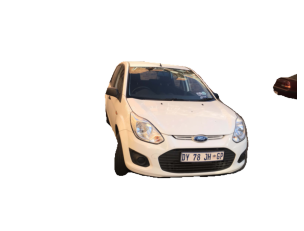

In [25]:
remove_background(change_bg,img2,2)

# White background

Successful


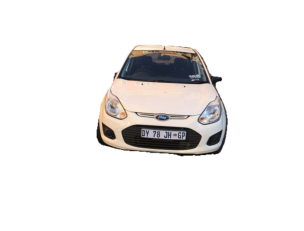

In [26]:
white_background(change_bg,img1,1)

Successful


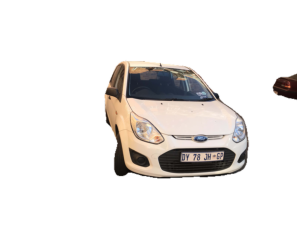

In [27]:
white_background(change_bg,img2,2)